**Processing Data**

In [1]:
# setup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import data_preparation as dp  
from sklearn.preprocessing import MinMaxScaler 
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from math import log


In [2]:
# get data 
# url = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv"
url = 'insurance_data.csv'

insurance_data = pd.read_csv(url)
insurance_data = dp.clean_insurance_data(insurance_data)
insurance_data.head(1)

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,QZ44356,Arizona,F,Bachelor,697953.59,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935


> X-y split. Remember that at this time you need the complete dataset, both numerical and categorical in the X features.

In [3]:
# setting y (target) as total_claim_amount 
y = insurance_data['total_claim_amount']
# set X to all columns, minus the target
X = insurance_data.drop(['total_claim_amount'], axis=1)

> X split into X_numerical and X_categorical

In [4]:
# separate numerical from categorical!!!!
X_numerical= X.select_dtypes(include = np.number)
X_categorical = X.select_dtypes(include = object)

> Scaling (X_numerical)

In [5]:
# choosing min-max-scaling
transformer = MinMaxScaler().fit(X_numerical)
x_normalized = transformer.transform(X_numerical)
X_numerical = pd.DataFrame(x_normalized, columns=X_numerical.columns)
#checking if min 0, max 1
X_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,1068.0,0.105632,0.114575,0.0,0.036140,0.069039,0.123900,1.0
income,1068.0,0.393311,0.304966,0.0,0.140776,0.362405,0.646946,1.0
monthly_premium_auto,1068.0,0.003731,0.045427,0.0,0.000198,0.000609,0.001367,1.0


**Round 6**
>One Hot/Label Encoding (categorical).

In [6]:
X_categorical.head(4)

,customer,state,gender,education,number_of_open_complaints,policy_type,vehicle_class
0,QZ44356,Arizona,F,Bachelor,0,Personal Auto,Four-Door Car
1,AI49188,Nevada,F,Bachelor,0,Personal Auto,Two-Door Car
2,WW63253,California,M,Bachelor,0,Corporate Auto,SUV
3,GA49547,Washington,M,High School or Below,0,Personal Auto,Four-Door Car


In [7]:
from sklearn.preprocessing import LabelEncoder

labels_categorical= pd.DataFrame()

for column in X_categorical:
    encoded_label = LabelEncoder().fit_transform(X_categorical[column])
    labels_categorical[column] = encoded_label

X_categorical = labels_categorical
X_categorical.head(4)


,customer,state,gender,education,number_of_open_complaints,policy_type,vehicle_class
0,694,0,0,0,0,1,0
1,10,2,0,0,0,1,4
2,946,1,1,0,0,0,2
3,250,4,1,3,0,1,0


>Concat DataFrames

In [8]:
X = pd.concat([X_numerical, X_categorical], axis=1)

In [9]:
X

,customer_lifetime_value,income,monthly_premium_auto,customer,state,gender,education,number_of_open_complaints,policy_type,vehicle_class
0,0.088586,0.000000,0.000935,694,0,0,0,0,1,0
1,0.193779,0.487865,0.001332,10,2,0,0,0,1,4
2,0.100450,0.000000,0.001275,946,1,1,0,0,0,2
3,0.059804,0.363715,0.000198,250,4,1,3,0,1,0
4,0.111319,0.629272,0.000227,559,3,0,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...
1063,0.018788,0.386595,0.000482,813,3,1,4,1,1,0
1064,0.326031,0.632343,0.001162,892,1,0,3,2,1,2
1065,0.021986,0.160674,0.000765,281,0,0,0,0,1,0
1066,0.046694,0.795188,0.001502,113,1,0,4,0,2,2


**Linear Regression**
>Train-test split.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(854, 10)
(214, 10)
(854,)
(214,)


>Apply linear regression.

In [12]:
# train/fit model 
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [13]:
predictions = lm.predict(X_train)
# predictions

In [14]:
predictions_test = lm.predict(X_test)
# predictions_test

**Description:**

In [15]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

> R2.

In [16]:
print("R2-score is ", lm.score(X,y))

R2-score is  0.17387740251717343


> MSE.


In [17]:
print("MSE is ", mean_squared_error(y_test,predictions_test))

MSE is  56311.67424041667


> RMSE.

In [18]:
print("RMSE-score is ", np.sqrt(mean_squared_error(y_test,predictions_test)))

RMSE-score is  237.3008096075879


> MAE.

In [19]:
print("MAE-score is ", mean_absolute_error(y_test, predictions_test))

MAE-score is  174.99826149691697


**Modeling**

>Try to improve the linear regression model. Remember the previous rounds. Follow the steps as shown in previous lectures and try to improve the accuracy of the model.

>Some approaches you can try in this exercise:  
-use the concept of multicollinearity and remove insignificant variables  
-use a different method of scaling the numerical variables  
-use a different ratio of train test split  
-use the transformation on numerical columns which align it more towards a normal distribution

> use the concept of multicollinearity and remove insignificant variables  


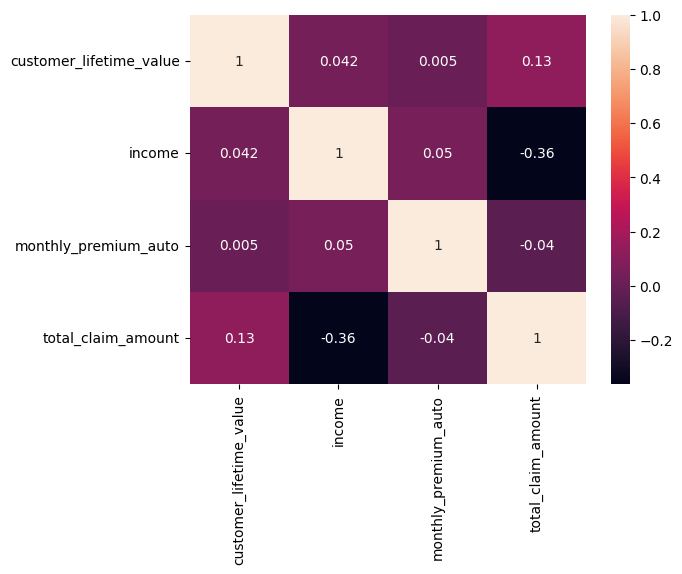

In [20]:
# grab all numerical data, including targer
correlation_data = insurance_data.select_dtypes(include = np.number)
correlations_matrix = correlation_data.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

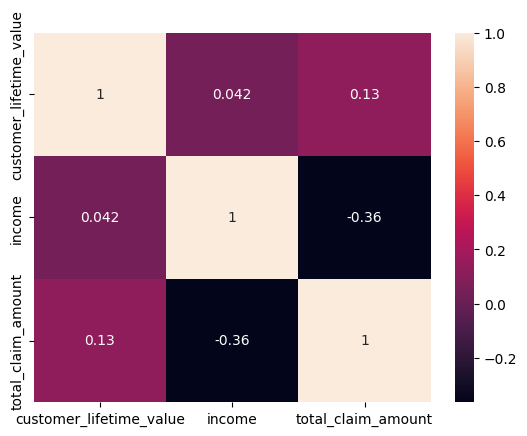

In [21]:
# monthly_premium_auto has a very low correlation (makes sense), so I'm dropping it

reduced_data = correlation_data.drop(['monthly_premium_auto'],axis=1).copy()
correlations_matrix2 = reduced_data.corr()
sns.heatmap(correlations_matrix2, annot=True)
plt.show()

In [22]:
# drop monthly_premium_auto
X_dropped = X.copy()
X_dropped = X.drop(['monthly_premium_auto'],axis=1)

In [23]:

# refit and train the model
lm_dropped = linear_model.LinearRegression() 
X_train_dropped, X_test_dropped, y_train_dropped, y_test_dropped = train_test_split(X_dropped, y, test_size=0.2, random_state=42)
lm_dropped.fit(X_train_dropped,y_train_dropped)

predictions_dropped = lm_dropped.predict(X_train_dropped)
predictions_test_dropped = lm_dropped.predict(X_test_dropped)

print("R2-score is ", lm_dropped.score(X_dropped,y))
print("MSE is ", mean_squared_error(y_test_dropped,predictions_test_dropped))
print("RMSE-score is ", np.sqrt(mean_squared_error(y_test_dropped,predictions_test_dropped)))
print("MAE-score is ", mean_absolute_error(y_test_dropped, predictions_test_dropped))

R2-score is  0.17378569518897524
MSE is  56311.178983027516
RMSE-score is  237.29976608295996
MAE-score is  174.9581711956575


> use a different method of scaling the numerical variables  

In [24]:
# choosing Standardscaler
X_numerical_standard = X.select_dtypes(include = np.number)
transformer = StandardScaler().fit(X_numerical_standard)
x_standardized = transformer.transform(X_numerical_standard)
x_standardized = pd.DataFrame(x_standardized, columns=X_numerical_standard.columns)

In [25]:
X_standard = pd.concat([x_standardized, X_categorical], axis=1) 

In [26]:
# refit and train the model
lm_standard = linear_model.LinearRegression() 
X_train_standard, X_test_standard, y_train_standard, y_test_standard = train_test_split(X_standard, y, test_size=0.2, random_state=42)
lm_standard.fit(X_train_standard,y_train_dropped)

predictions_standard = lm_standard.predict(X_train_standard)
predictions_test_standard = lm_standard.predict(X_test_standard)

print("R2-score is ", lm_standard.score(X_standard,y))
print("MSE is ", mean_squared_error(y_test_standard,predictions_test_standard))
print("RMSE-score is ", np.sqrt(mean_squared_error(y_test_standard,predictions_test_standard)))
print("MAE-score is ", mean_absolute_error(y_test_standard, predictions_test_standard))

R2-score is  0.17387740251717276
MSE is  56311.674240416905
RMSE-score is  237.30080960758838
MAE-score is  174.99826149691683


> use a different ratio of train test split  

In [27]:
# train down to 5 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# train/fit model 
lm_5_percent_train = linear_model.LinearRegression()
lm_5_percent_train.fit(X_train,y_train)

predictions_5_percent_train = lm_5_percent_train.predict(X_train)
predictions_test_5_percent_train = lm_5_percent_train.predict(X_test)

print("R2-score is ", lm_5_percent_train.score(X,y))
print("MSE is ", mean_squared_error(y_test,predictions_test_5_percent_train))
print("RMSE-score is ", np.sqrt(mean_squared_error(y_test,predictions_test_5_percent_train)))
print("MAE-score is ", mean_absolute_error(y_test, predictions_test_5_percent_train))

R2-score is  0.17478072320997173
MSE is  38316.814323803934
RMSE-score is  195.74681178451908
MAE-score is  163.08111093337249


In [28]:
# train up to 25 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# train/fit model 
lm_25_percent_train = linear_model.LinearRegression()
lm_25_percent_train.fit(X_train,y_train)

predictions_25_percent_train = lm_25_percent_train.predict(X_train)
predictions_test_25_percent_train = lm_25_percent_train.predict(X_test)

print("R2-score is ", lm_25_percent_train.score(X,y))
print("MSE is ", mean_squared_error(y_test,predictions_test_25_percent_train))
print("RMSE-score is ", np.sqrt(mean_squared_error(y_test,predictions_test_25_percent_train)))
print("MAE-score is ", mean_absolute_error(y_test, predictions_test_25_percent_train))

R2-score is  0.1726435127121574
MSE is  55149.610865352486
RMSE-score is  234.83954280604553
MAE-score is  176.89574147147366


> use the transformation on numerical columns which align it more towards a normal distribution

In [29]:
# apply log to all numerical values
X_numerical_log = X.copy()

# https://numpy.org/doc/stable/reference/generated/numpy.log1p.html#numpy.log1p
for column in X_numerical_log.columns:
    X_numerical_log[column] = np.log1p(X[column])

#X_numerical_log

In [30]:
X_standard = pd.concat([X_numerical_log, X_categorical], axis=1) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train/fit model 
lm_log = linear_model.LinearRegression()
lm_log.fit(X_train,y_train)

predictions_log = lm_log.predict(X_train)
predictions_test_log = lm_log.predict(X_test)

print("R2-score is ", lm_log.score(X,y))
print("MSE is ", mean_squared_error(y_test,predictions_test_log))
print("RMSE-score is ", np.sqrt(mean_squared_error(y_test,predictions_test_log)))
print("MAE-score is ", mean_absolute_error(y_test, predictions_test_log))

R2-score is  0.17387740251717343
MSE is  56311.67424041667
RMSE-score is  237.3008096075879
MAE-score is  174.99826149691697


**different approach**


> asumming that income = 0 is unrealistic (they): dropping those rows completetly 